In [1]:
#import necessary libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import svm

See this documentation to know about SVM: https://scikit-learn.org/stable/modules/svm.html

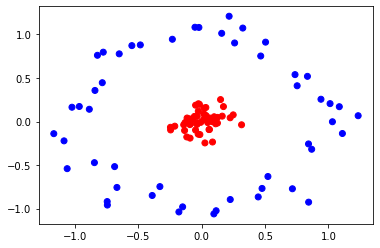

In [2]:
# creating the data points and visualizing it
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)  # X contains the X and Y co-ordinates of the data points
                                               # y contains the labels for each data points

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')

In [3]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# function to plot decision boundary 
def plot_decision_boundary(X,y,ker ='linear'):
  model = svm.SVC(kernel=ker)
  clf = model.fit(X, y)
  fig, ax = plt.subplots()
  # title for the plots
  title = (F"Decision surface by {ker} Kernel ")
  # Set-up grid for plotting.
  X0, X1 = X[:, 0], X[:, 1]
  xx, yy = make_meshgrid(X0, X1)
  plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
  ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
  ax.set_ylabel('y')
  ax.set_xlabel('x')
  ax.set_xticks(())
  ax.set_yticks(())
  ax.set_title(title)
  plt.show()

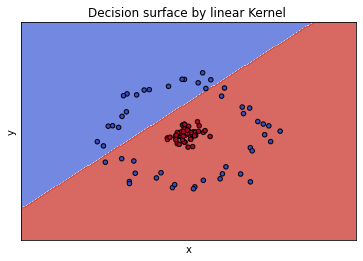

In [4]:
#using linear kernel
plot_decision_boundary(X,y,'linear')


We are fitting linear classifier to non-linear data. So it's not classifying the data points correctly as expected. The blue datapoints are identified along with red since the data is non-linear.

In [5]:
#function for 3d representation of our data
def plot_3d(X, y):
    r = np.exp(-(X ** 2).sum(1)) # r is the corresponding z-axis value for each data point
    axes = plt.subplot(projection='3d')
    axes.scatter3D(X[:, 0], X[:, 1], r, c=y, s=100, cmap='bwr')
    axes.set_xlabel('X1')
    axes.set_ylabel('X2')
    axes.set_zlabel('y')
    return axes

<Axes3DSubplot:xlabel='X1', ylabel='X2'>

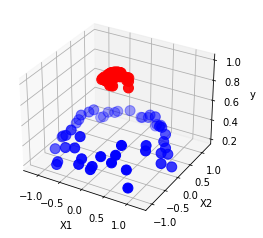

In [6]:
plot_3d(X, y)

### We will now see how using a non-linear kernel will change the decision boundary

Refer to this document to know more about RBF Kernel:
https://towardsdatascience.com/radial-basis-function-rbf-kernel-the-go-to-kernel-acf0d22c798a

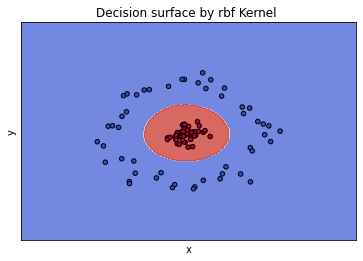

In [7]:
#using rbf kernel
plot_decision_boundary(X,y,'rbf')

Here the decision boundary is perfectly seperating both the classes of data points.